In [84]:
import pandas as pd
import numpy as np
#from google.colab import drive
import os

In [ ]:
#Levanto drive para poder almacenar los archivos
#drive.mount("/content/drive")
#contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
#if not os.path.exists(contentFolder):
#    os.mkdir(contentFolder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#Levantamos la base
data = pd.read_csv("./Data/titanic_train.txt")
#data = pd.read_csv("{}/titanic_train.txt".format(contentFolder))


In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
#Para validar valores nulos se usa la funcion .isnull()
data.isnull() #De esta forma pondrá True o False en cada celda de todo el DataFrame (true es nulo false no)
#data.Sex.isnull() #Se puede seleccionar sólo una columna

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
#Agregando la función .sum() nos traerá un conteo de valores nulos (Recordá que el True es equivalente a 1 y False, a 0)
#Si queremos más orden podemos usar la función .sort_values() (el parámetro ascending True será ascendente el orden, False, será descendente
data.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [29]:
#data.sort_values(by="Age", ascending = False)
data.sort_values(by="Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [30]:
#Podemos transformar la sentencia anterior en porcentajes
data.isnull().sum().sort_values(ascending = False) / len(data)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [31]:
#La variable Cabin posee mucha cantidad de registros en nulos
#data = data.drop(columns=["Cabin"])
data.drop(columns=["Cabin"], inplace=True)

In [33]:
#función np.where para imputar valores como si fuera un ifnp.where(condicion, valor por True, valor por False)
median = data.Age.median()
median

28.0

In [34]:
data["Age"] = np.where(data.Age.isnull(), median, data.Age)

In [35]:
data["Sex"].drop_duplicates()

0      male
1    female
Name: Sex, dtype: object

In [37]:
#Convertir variables categóricas en variables tipo dummies (Una de la formas de hacer one hot encoding)
pd.get_dummies(data["Sex"]).astype(int)


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Vamos a hacer un merge entre la base original y el get_dummies

In [38]:
data = data.join(pd.get_dummies(data["Sex"]).astype(int))


In [47]:
dataSex = data.groupby("Sex").agg({"Survived": ["count", "sum"]})
dataSex

Survived     
          count  sum
Sex                 
female      314  233
male        577  109

In [48]:
#Vamos a ver que la base tiene como columnas una suma de nombres (Survived, count) y (Survived, sum)
#Esto muchas veces genera un problema para trabajar con las columnas
dataSex.columns

MultiIndex([('Survived', 'count'),
            ('Survived',   'sum')],
           )

In [50]:
#Modifico el nombre de las columnas
dataSex.columns = ["count", "sumSurvived"]
dataSex

,count,sumSurvived
Sex,,
female,314,233
male,577,109


In [53]:
len(data)

891

In [54]:
#Creo una variable con la suma de sobrevividos por la cantidad abierto por Sex
dataSex["pcSurvivedSex"] = dataSex["sumSurvived"] / dataSex["count"]
dataSex["pcSurvivedTotal"] = dataSex["sumSurvived"] / len(data)
dataSex

,count,sumSurvived,pcSurvivedSex,pcSurvivedTotal
Sex,,,,
female,314,233,0.742038,0.261504
male,577,109,0.188908,0.122334


891

In [61]:
#Vamos a imputar el valor 0.74 en el Campo Sex cuando Sex = female y 0.18 cuando Sex = male

#->female 0.74
#->male 0.18

#Lo vamos a hacer de dos formas diferentes
#Primera forma (Menos performante pero la iteracion nos permite hacer muchas cosas)
for index, row in data.iterrows():
  if row["Sex"] == "female":
    print("La persona cuyo id es {} es de genero {}".format(row["PassengerId"], row["Sex"]))
    data.loc[index, "SexPc"] = 0.74
  else:
    data.loc[index, "SexPc"] = 0.18
data.head()

La persona cuyo id es 2 es de genero female
La persona cuyo id es 3 es de genero female
La persona cuyo id es 4 es de genero female
La persona cuyo id es 9 es de genero female
La persona cuyo id es 10 es de genero female
La persona cuyo id es 11 es de genero female
La persona cuyo id es 12 es de genero female
La persona cuyo id es 15 es de genero female
La persona cuyo id es 16 es de genero female
La persona cuyo id es 19 es de genero female
La persona cuyo id es 20 es de genero female
La persona cuyo id es 23 es de genero female
La persona cuyo id es 25 es de genero female
La persona cuyo id es 26 es de genero female
La persona cuyo id es 29 es de genero female
La persona cuyo id es 32 es de genero female
La persona cuyo id es 33 es de genero female
La persona cuyo id es 39 es de genero female
La persona cuyo id es 40 es de genero female
La persona cuyo id es 41 es de genero female
La persona cuyo id es 42 es de genero female
La persona cuyo id es 44 es de genero female
La persona cuy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,SexPc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0.18
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0.74
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0.74
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0.74
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0.18


In [62]:
#Segunda forma (Mas performante)
data["SexPc2"] = np.where(data.Sex == "female", 0.74, 0.18)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,SexPc,SexPc2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0.18,0.18
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0.74,0.74
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0.74,0.74
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0.74,0.74
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0.18,0.18


In [63]:
#Podemos usar np.where cuando hay mas de un valor a modificar, por ejemplo PClass
data["PclassString"] = np.where(data.Pclass == 1, "First Class", " ")
data["PclassString"] = np.where(data.Pclass == 2, "Second Class", data.PclassString)
data["PclassString"] = np.where(data.Pclass == 3, "Third Class", data.PclassString)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,SexPc,SexPc2,PclassString
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0.18,0.18,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0.74,0.74,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0.74,0.74,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0.74,0.74,First Class
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0.18,0.18,Third Class


In [65]:
#La función qcut nos ayudará a cortar la base en q cuantiles, podremos ver los valores que optó para cortar o que muestre el cuantile
#todo usando la variable Labels=False
#pd.qcut(data.Age, 4)
pd.qcut(data.Age, 4, labels=False)

0      0
1      3
2      1
3      2
4      2
      ..
886    1
887    0
888    1
889    1
890    2
Name: Age, Length: 891, dtype: int64

In [70]:
data["quartilesAge"] = pd.qcut(data.Age, 4, labels=False)
data["decilesAge"] = pd.qcut(data.Age, 10, labels=False, duplicates = "drop")
data["quintilesAge"] = pd.qcut(data.Age, 5, labels=False, duplicates = "drop")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,SexPc,SexPc2,PclassString,quartilesAge,decilesAge,quintilesAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0.18,0.18,Third Class,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0.74,0.74,First Class,3,5,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0.74,0.74,Third Class,1,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0.74,0.74,First Class,2,5,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0.18,0.18,Third Class,2,5,2


In [72]:
# la función cut nos permitirá cortar una variable en los buckets que deseamos nosotros, sin usar quantiles.
data["ageBuckets"] = pd.cut(data.Age, [0, 10,20,30,40,50,100])
data.groupby("ageBuckets").size()

C:\Users\Diego\AppData\Local\Temp\ipykernel_21608\1508417921.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("ageBuckets").size()


ageBuckets
(0, 10]       64
(10, 20]     115
(20, 30]     407
(30, 40]     155
(40, 50]      86
(50, 100]     64
dtype: int64

In [73]:
#Quiero hacer un split de alguna columna. Para eso lo que vamos a hacer es transformar en string la columna ageBuckets
data["ageBuckets"] = data["ageBuckets"].astype(str)
#Luego vamos a dividir el valor de la columna en dos columnas diferentes dividiendolo por la ","

data.ageBuckets.str.split(",", expand=True)

,0,1
0,(20,30]
1,(30,40]
2,(20,30]
3,(30,40]
4,(30,40]
...,...,...
886,(20,30]
887,(10,20]
888,(20,30]
889,(20,30]


In [74]:
#Creo dos columnas con la separacion de una (Puede servir para separar nombre y apellido, separar telefonos, etc)
data[["primeraParte", "segundaParte"]] = data.ageBuckets.str.split(",", expand=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,male,SexPc,SexPc2,PclassString,quartilesAge,decilesAge,quintilesAge,ageBuckets,primeraParte,segundaParte
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0.18,0.18,Third Class,0,2,1,"(20, 30]",(20,30]
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0.74,0.74,First Class,3,5,2,"(30, 40]",(30,40]
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0.74,0.74,Third Class,1,3,1,"(20, 30]",(20,30]
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0.74,0.74,First Class,2,5,2,"(30, 40]",(30,40]
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0.18,0.18,Third Class,2,5,2,"(30, 40]",(30,40]


In [ ]:
[x for x in iterador]

In [80]:
#Vamos a crear una funcion para que pueda ser aplicada a todo el DataFrame

import math
def convertLog(x):
  return math.log(x)


data["AgeLog"] = data["Age"].apply(lambda x: convertLog(x))
#data["AgeLog"] = data["Age"].apply(lambda x: convertLog(x) if x > 10 else x)


In [79]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,SexPc,SexPc2,PclassString,quartilesAge,decilesAge,quintilesAge,ageBuckets,primeraParte,segundaParte,AgeLog
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.18,0.18,Third Class,0,2,1,"(20, 30]",(20,30],3.091042
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.74,0.74,First Class,3,5,2,"(30, 40]",(30,40],3.637586
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.74,0.74,Third Class,1,3,1,"(20, 30]",(20,30],3.258097
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.74,0.74,First Class,2,5,2,"(30, 40]",(30,40],3.555348
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.18,0.18,Third Class,2,5,2,"(30, 40]",(30,40],3.555348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0.18,0.18,Second Class,1,3,1,"(20, 30]",(20,30],3.295837
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0.74,0.74,First Class,0,1,0,"(10, 20]",(10,20],2.944439
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,0.74,0.74,Third Class,1,3,1,"(20, 30]",(20,30],3.332205
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0.18,0.18,First Class,1,3,1,"(20, 30]",(20,30],3.258097


In [81]:
ageMean = data.Age.mean()
data.Age.map(lambda x: x - ageMean) #Mapeo un campo en este caso Age y lo que puedo hacer es operaciones con otros datos

0      -7.361582
1       8.638418
2      -3.361582
3       5.638418
4       5.638418
         ...    
886    -2.361582
887   -10.361582
888    -1.361582
889    -3.361582
890     2.638418
Name: Age, Length: 891, dtype: float64

## Comenzamos a Graficar ##

### Creamos un grafico de Scatter usando Pandas [documentacion](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) y usando una libreria llamada seaborn [documentacion](https://seaborn.pydata.org/index.html)  ###

<Axes: title={'center': 'Scatter'}, xlabel='Age', ylabel='Fare'>

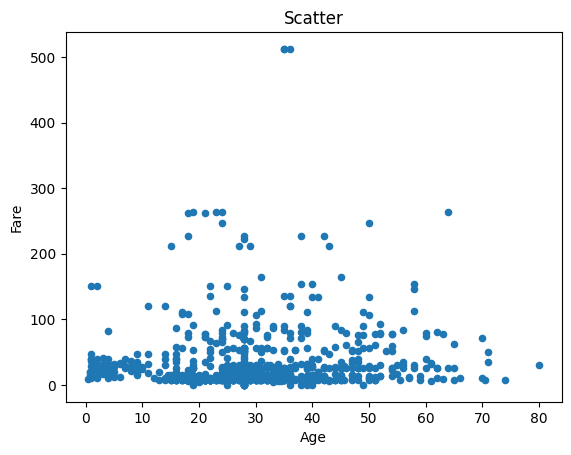

In [85]:
#Armamos un grafico de Scatter con Pandas
data.plot(x='Age', y='Fare', kind='scatter', title="Scatter")


In [111]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Axes: xlabel='Age', ylabel='Fare'>

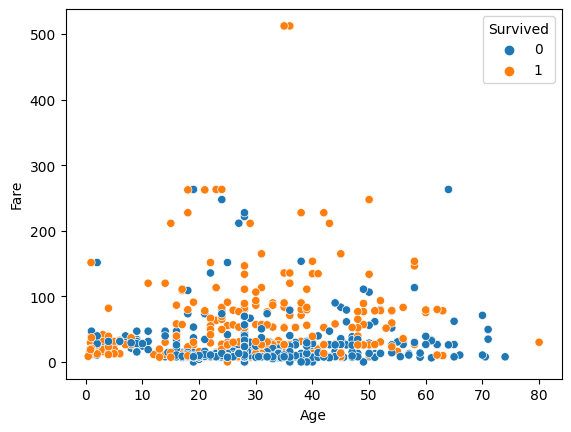

In [90]:
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html

import seaborn as sns

#sns.scatterplot(data=data, x="Age", y="Fare")
sns.scatterplot(data=data, x="Age", y="Fare", hue="Survived")


### Grafico de barras ###

In [95]:
data.groupby("Sex").size().to_frame("q").reset_index()

,Sex,q
0,female,314
1,male,577


<Axes: ylabel='Sex'>

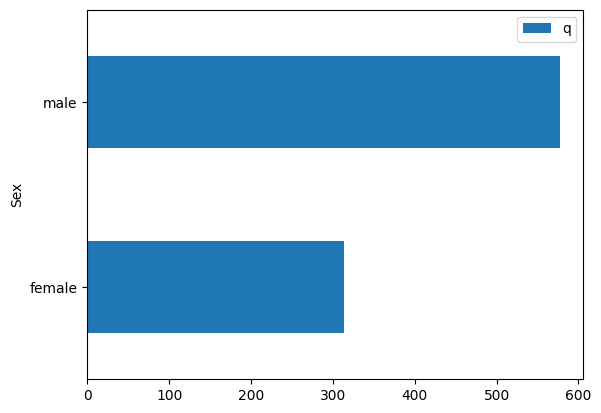

In [97]:
dataSexQ = data.groupby("Sex").size().to_frame("q").reset_index()
#dataSexQ.plot(x="Sex", y="q", kind="bar")
dataSexQ.plot(x="Sex", y="q", kind="barh")

C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Axes: xlabel='Embarked', ylabel='Age'>

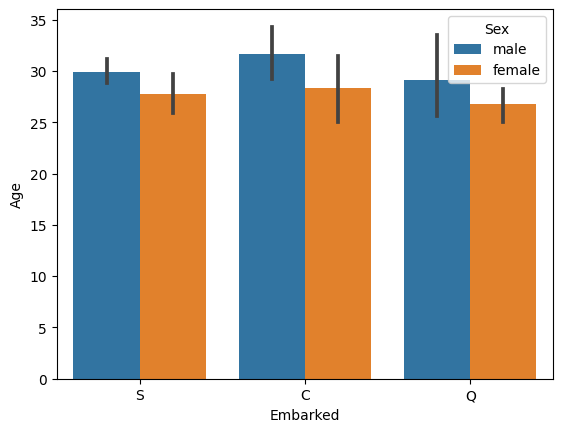

In [98]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
#sns.barplot(data=dataSexQ, x="Sex", y="q")
sns.barplot(data=data, x="Embarked", y="Age", hue="Sex")


### Boxplot ###

C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Diego\Documents\proyectos\cienciaDatos\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Axes: xlabel='Pclass', ylabel='Age'>

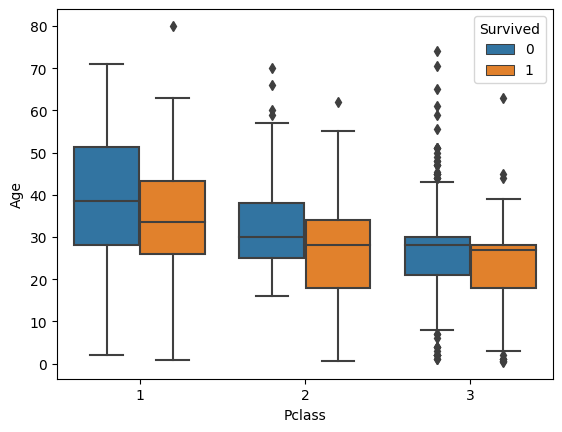

In [102]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
#sns.boxplot(data=data, x="Pclass", y="Age")
sns.boxplot(data=data, x="Pclass", y="Age", hue="Survived")


,Pclass,Fare,Age
Pclass,1.000000,-0.549500,-0.339898
Fare,-0.549500,1.000000,0.096688
Age,-0.339898,0.096688,1.000000


### Heatmap ###

In [109]:
 pd.crosstab(data["Embarked"], data["Pclass"])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


<Axes: xlabel='Pclass', ylabel='Embarked'>

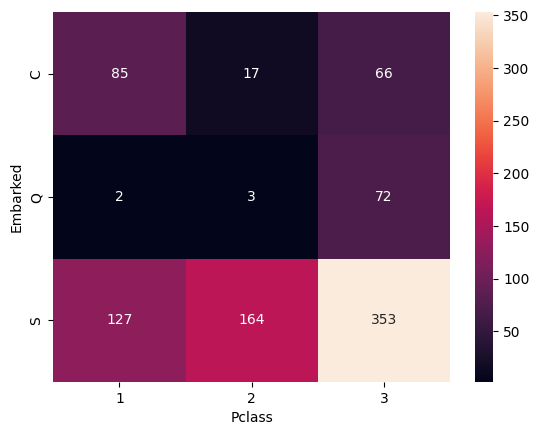

In [110]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
dataHeat = pd.crosstab(data["Embarked"], data["Pclass"])

sns.heatmap(dataHeat, annot=True, fmt=".0f")